In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import itertools
import matplotlib.pyplot as plt
#from matplotlib import cm

In [4]:
# function for fitting with relation to T_in and T_out
# x=T_in, y=T_out, z= size to fit

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # starting values
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Function to calculate z using parameters and any x and y:
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

In [8]:
data_keymark = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_keymark = data_keymark.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
Models=data_keymark['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
K = 273.15
eta_carnot_key = (data_keymark['T_out']+K) / ((data_keymark['T_out']+K)-(data_keymark['T_in']+K))
data_keymark['eta'] = data_keymark['COP'] / eta_carnot_key
data_keymark.fillna(0, inplace=True)


,T_in,T_out,P_el,P_th,COP
0,-9.9,35,3.0343,9.8823,3.256863
1,-9.8,35,3.0370,9.9199,3.266348
2,-9.7,35,3.0397,9.9575,3.275817
3,-9.6,35,3.0425,9.9951,3.285160
4,-9.5,35,3.0452,10.0327,3.294595
...,...,...,...,...,...
1195,29.6,65,5.3976,20.8281,3.858771
1196,29.7,65,5.3974,20.8493,3.862841
1197,29.8,65,5.3973,20.8705,3.866841
1198,29.9,65,5.3972,20.8917,3.870840


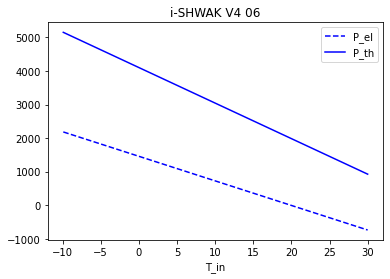

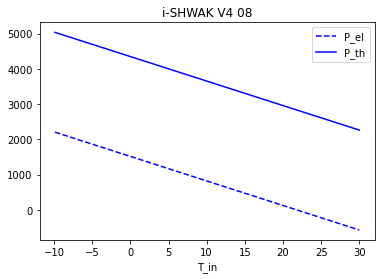

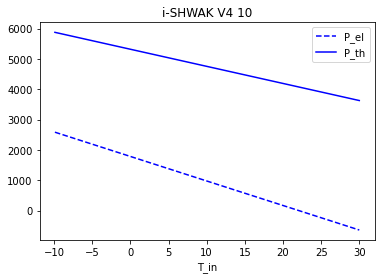

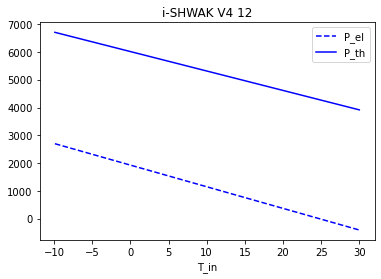

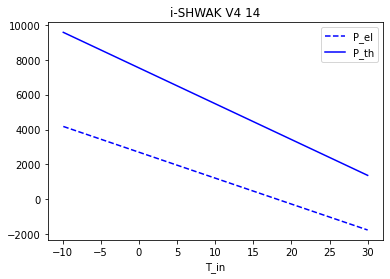

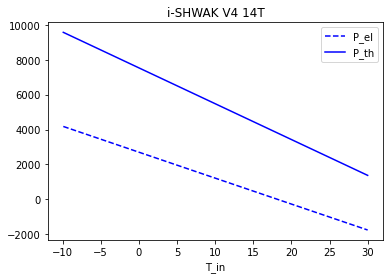

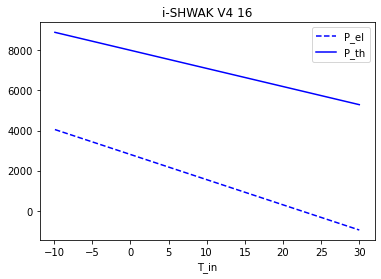

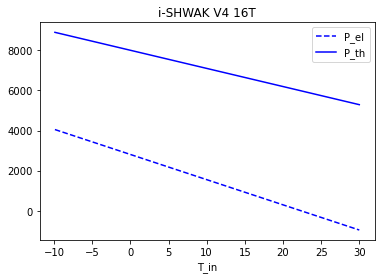

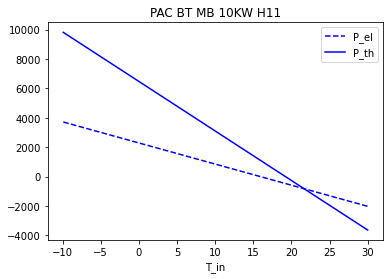

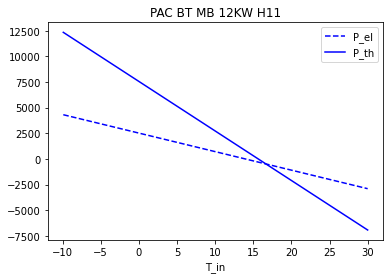

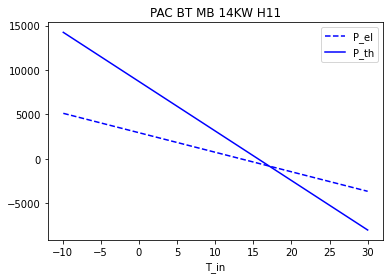

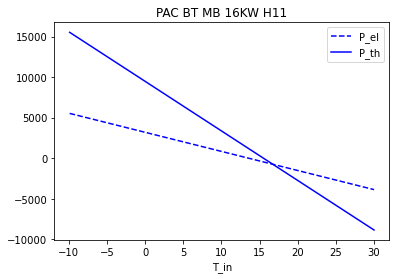

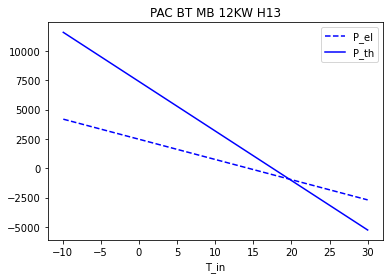

KeyboardInterrupt: 

In [35]:
data_ref = pd.read_csv(r'validation\AIT_SWCV_122\ait-SWCV-diagramm.csv', delimiter=',', decimal=',')
data_ref.drop(['P_el','P_th'], axis=1)
for model in Models:

    data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
    data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})

    #data_key= data_key.loc[data_key['Climate']== 'cold']

    data_key= data_key.loc[data_key['Model']== model]
    K = 273.15
    eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
    data_key['eta'] = data_key['COP'] / eta_carnot_key
    data_key.fillna(0, inplace=True)
    variables=['P_el', 'P_th', 'COP', 'eta']
    for var in variables:
        vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
        data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
        data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
        d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
        vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])

    para_key = pd.DataFrame(index=['p1', 'p2', 'p3'])
    para_key['P_el']=P_el_para_key
    para_key['P_th']=P_th_para_key
    para_key['COP']=COP_para_key
    para_key['eta']=eta_para_key
    data_ref['P_el_fit_key'] = func_simple(para_key['P_el'], data_ref['T_in'], data_ref['T_out'])
    fig, axes = plt.subplots(nrows=1, ncols=1)
    #data_ref.plot(ax=axes, x='T_in', y, kind='scatter', label='P_el_35', c='Blue', title='P_el: Comparison between reference data and fits')
    data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_el_fit_key', kind='line', label='P_el', c='Blue', linestyle='--', title=model)
    data_ref['P_th_fit_key'] = func_simple(para_key['P_th'], data_ref['T_in'], data_ref['T_out'])
    data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th', c='Blue', linestyle='-')
    plt.show()